<a href="https://colab.research.google.com/github/saathwikad/ImageClassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [6]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model=RandomForestClassifier()

In [9]:
model.fit(x_train2,y_train)

<ipython-input-9-97b78d839c03>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train2,y_train)


RandomForestClassifier()

In [10]:
y_pred=model.predict(x_test2)
y_pred

array([3, 8, 8, ..., 3, 6, 7], dtype=uint8)

In [11]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1001
           1       0.54      0.51      0.52      1060
           2       0.32      0.36      0.34       898
           3       0.27      0.34      0.30       791
           4       0.38      0.40      0.39       963
           5       0.39      0.43      0.41       904
           6       0.58      0.47      0.52      1231
           7       0.46      0.49      0.48       931
           8       0.63      0.57      0.60      1098
           9       0.55      0.49      0.52      1123

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [12]:
confusion_matrix(y_pred,y_test)

array([[552,  28, 101,  49,  52,  30,  12,  48,  88,  41],
       [ 42, 539,  46,  54,  24,  31,  34,  44,  85, 161],
       [ 63,  24, 321,  84, 142,  93,  79,  56,  17,  19],
       [ 14,  36,  74, 267,  51, 160,  75,  55,  23,  36],
       [ 25,  17, 154,  90, 381,  63, 106,  94,  19,  14],
       [ 17,  30,  59, 168,  50, 390,  54,  83,  33,  20],
       [ 27,  34, 127, 134, 167,  78, 578,  46,  11,  29],
       [ 31,  40,  68,  62,  84,  93,  25, 459,  23,  46],
       [181,  66,  27,  22,  33,  31,   6,  24, 627,  81],
       [ 48, 186,  23,  70,  16,  31,  31,  91,  74, 553]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=7)

In [15]:
knn.fit(x_train2,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [16]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [17]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [18]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]])

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc=DecisionTreeClassifier()

In [21]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [22]:
y_pred_dtc=dtc.predict(x_test2)

y_pred_dtc

array([7, 8, 9, ..., 2, 2, 1], dtype=uint8)

In [28]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34      1067
           1       0.26      0.27      0.26       942
           2       0.23      0.21      0.22      1109
           3       0.18      0.19      0.18       955
           4       0.23      0.22      0.23      1015
           5       0.21      0.22      0.22       960
           6       0.28      0.29      0.29       976
           7       0.27      0.27      0.27       977
           8       0.38      0.37      0.38      1019
           9       0.29      0.30      0.29       980

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [29]:
confusion_matrix(y_pred_dtc,y_test)

array([[349,  77,  98,  68,  60,  60,  50,  88, 133,  84],
       [ 73, 256,  42,  64,  43,  58,  50,  82, 114, 160],
       [ 90,  83, 231, 121, 161, 106, 122,  84,  51,  60],
       [ 47,  78,  99, 179,  79, 161, 123,  89,  42,  58],
       [ 65,  58, 141, 105, 228,  86, 138,  95,  56,  43],
       [ 51,  52, 116, 133, 109, 212,  92, 101,  42,  52],
       [ 40,  53,  99, 135, 125, 108, 282,  63,  31,  40],
       [ 56,  66,  81,  96, 110,  97,  66, 267,  40,  98],
       [156, 113,  37,  39,  39,  59,  28,  53, 382, 113],
       [ 73, 164,  56,  60,  46,  53,  49,  78, 109, 292]])

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb=GaussianNB()

In [32]:
nb.fit(x_train2,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [33]:
y_pred_nb=nb.predict(x_test2)

y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [34]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



In [35]:
confusion_matrix(y_pred_nb,y_test)

array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]])

In [41]:
img_path='/content/bird.jpg'

In [42]:
img_arr=cv2.imread(img_path)

In [43]:
print(img_arr)

[[[ 65  81  63]
  [ 65  81  63]
  [ 65  81  63]
  ...
  [ 74  85  69]
  [ 73  84  68]
  [ 73  84  68]]

 [[ 66  82  64]
  [ 66  82  64]
  [ 66  82  64]
  ...
  [ 73  84  68]
  [ 73  84  68]
  [ 72  83  67]]

 [[ 67  83  65]
  [ 67  83  65]
  [ 67  83  65]
  ...
  [ 73  84  68]
  [ 73  84  68]
  [ 72  83  67]]

 ...

 [[195 189 206]
  [194 188 205]
  [192 186 203]
  ...
  [ 53  64  56]
  [ 52  63  55]
  [ 52  63  55]]

 [[194 188 205]
  [193 187 204]
  [192 186 203]
  ...
  [ 52  63  55]
  [ 52  63  55]
  [ 52  63  55]]

 [[194 188 205]
  [193 187 204]
  [192 186 203]
  ...
  [ 51  62  54]
  [ 52  63  55]
  [ 53  64  56]]]


In [44]:
img_arr=cv2.resize(img_arr,(32,32))

In [45]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [47]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [48]:
ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

bird


In [76]:
img_path='/content/dog1.jpg'

In [77]:
img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(32,32))

In [78]:
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

array([[[125, 190, 168],
        [126, 192, 167],
        [129, 194, 169],
        ...,
        [123, 188, 166],
        [117, 187, 164],
        [115, 185, 162]],

       [[127, 193, 168],
        [129, 195, 170],
        [133, 198, 173],
        ...,
        [115, 188, 160],
        [114, 185, 159],
        [107, 180, 154]],

       [[122, 191, 164],
        [125, 194, 167],
        [131, 197, 172],
        ...,
        [104, 186, 157],
        [102, 184, 155],
        [ 99, 181, 152]],

       ...,

       [[ 73, 135, 117],
        [ 92, 151, 146],
        [ 93, 150, 135],
        ...,
        [ 67, 120, 110],
        [ 68, 127, 119],
        [ 69, 128, 113]],

       [[ 71, 129, 122],
        [ 79, 142, 132],
        [ 88, 139, 142],
        ...,
        [ 58, 112, 105],
        [ 45, 105, 168],
        [ 50, 101, 116]],

       [[ 57, 119,  97],
        [ 74, 136, 123],
        [ 80, 138, 132],
        ...,
        [ 73, 134, 125],
        [ 71, 118, 127],
        [ 73, 126, 132]]], dtype=uint8)
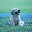

In [79]:
img_arr

In [80]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [81]:
ans=model.predict(img_arr2)